<a href="https://colab.research.google.com/github/astha1992/MovieLens/blob/master/Neural_Network_Project_Astha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not.

Context:

Businesses like banks which provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

Data Description:

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Link to the Kaggle project site: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#pip install tensorflow==2.0

In [4]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [5]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 43.3MB 3.0MB/s
     |████████████████████████████████| 71kB 6.0MB/s 
     |████████████████████████████████| 71kB 4.6MB/s 
     |████████████████████████████████| 604kB 19.1MB/s 
     |████████████████████████████████| 3.1MB 52.0MB/s 
     |████████████████████████████████| 71kB 9.9MB/s 
     |████████████████████████████████| 296kB 53.1MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=f361b1b332d28ac5c00cb07c8739da8219e2d8e31d1075d3f43cc5e9fc8c66f5
  Stored in directory: /tmp/pip-ephem-wheel-cache-s5bxa5ei/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=69cb6b7a31cc54b40d7d698dcf41c1f4b735cd6e60350c2af6c1641441b875d4
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=2919

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from pandas_profiling import ProfileReport
import seaborn as sns

Read the dataset. 
Drop the columns which are unique for all users like IDs (5points) 

In [7]:
from google.colab import drive

In [8]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
project_path = '/content/drive/My Drive/Colab Notebooks/'

In [10]:
dataset_file = project_path + 'bank.csv'

In [11]:
df = pd.read_csv(dataset_file)

In [12]:
df.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

In [13]:
profile= ProfileReport(df, title='Bank Data', html={'style':{'full_width':True}})

In [14]:
#profile.to_widgets()

In [15]:
profile.to_notebook_iframe()

In [16]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [18]:
#We shall drop RowNumber, Customer ID since all the values are unique. We shall also drop Surname due to high cardinality.

In [19]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [20]:
df.describe().T

count           mean  ...          75%        max
CreditScore      10000.0     650.528800  ...     718.0000     850.00
Age              10000.0      38.921800  ...      44.0000      92.00
Tenure           10000.0       5.012800  ...       7.0000      10.00
Balance          10000.0   76485.889288  ...  127644.2400  250898.09
NumOfProducts    10000.0       1.530200  ...       2.0000       4.00
HasCrCard        10000.0       0.705500  ...       1.0000       1.00
IsActiveMember   10000.0       0.515100  ...       1.0000       1.00
EstimatedSalary  10000.0  100090.239881  ...  149388.2475  199992.48
Exited           10000.0       0.203700  ...       0.0000       1.00

[9 rows x 8 columns]

In [21]:
#Analyzing Estimated Salaries
df1 = df.sort_values(by = 'EstimatedSalary', axis=0, ascending=True)
df1.head(10)

CreditScore Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
2362          709   Germany    Male  ...               1            11.58       1
9647          625    France    Male  ...               1            90.07       0
9010          645   Germany  Female  ...               0            91.75       1
5548          710    France    Male  ...               0            96.27       0
4989          629    France    Male  ...               0           106.67       0
7565          708    France    Male  ...               0           123.07       1
2498          718    France    Male  ...               1           142.81       0
8722          621    France    Male  ...               0           143.34       0
4774          811    France  Female  ...               1           178.19       0
1451          551    France  Female  ...               1           216.27       0

[10 rows x 11 columns]

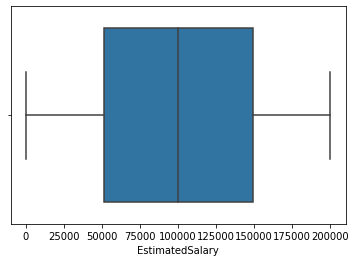

In [22]:
sns.boxplot(x=df['EstimatedSalary'])

In [23]:
#There are no outliers for salary however the Estimated salary of 11.58 looks weird relative to other records. Hence we shall not 
# consider this record in our dataset.

In [24]:
df= df[df['EstimatedSalary'] >= 90]

In [25]:
#Value counts of all categorical columns.
for i in list(df.columns[df.dtypes=='object']):   # checking value counts of all object type columns
    print(df[i].value_counts(normalize = True))
    print()

France     0.501450
Germany    0.250825
Spain      0.247725
Name: Geography, dtype: float64

Male      0.545655
Female    0.454345
Name: Gender, dtype: float64



<Figure size 576x360 with 0 Axes>

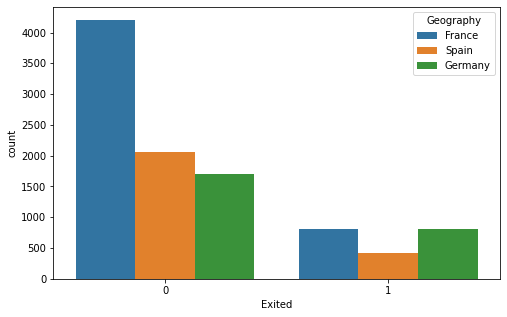

In [26]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=df['Exited'],hue=df['Geography']) 
plt.show()

<Figure size 576x360 with 0 Axes>

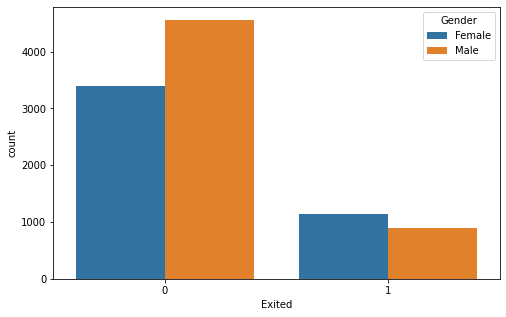

In [27]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=df['Exited'],hue=df['Gender']) 
plt.show()

In [28]:
AvgScores = df.groupby(['Exited']).mean()
AvgScores

CreditScore        Age  ...  IsActiveMember  EstimatedSalary
Exited                          ...                                 
0        651.853196  37.408389  ...        0.554565     99738.391772
1        645.320236  44.837917  ...        0.360511    101515.507638

[2 rows x 8 columns]

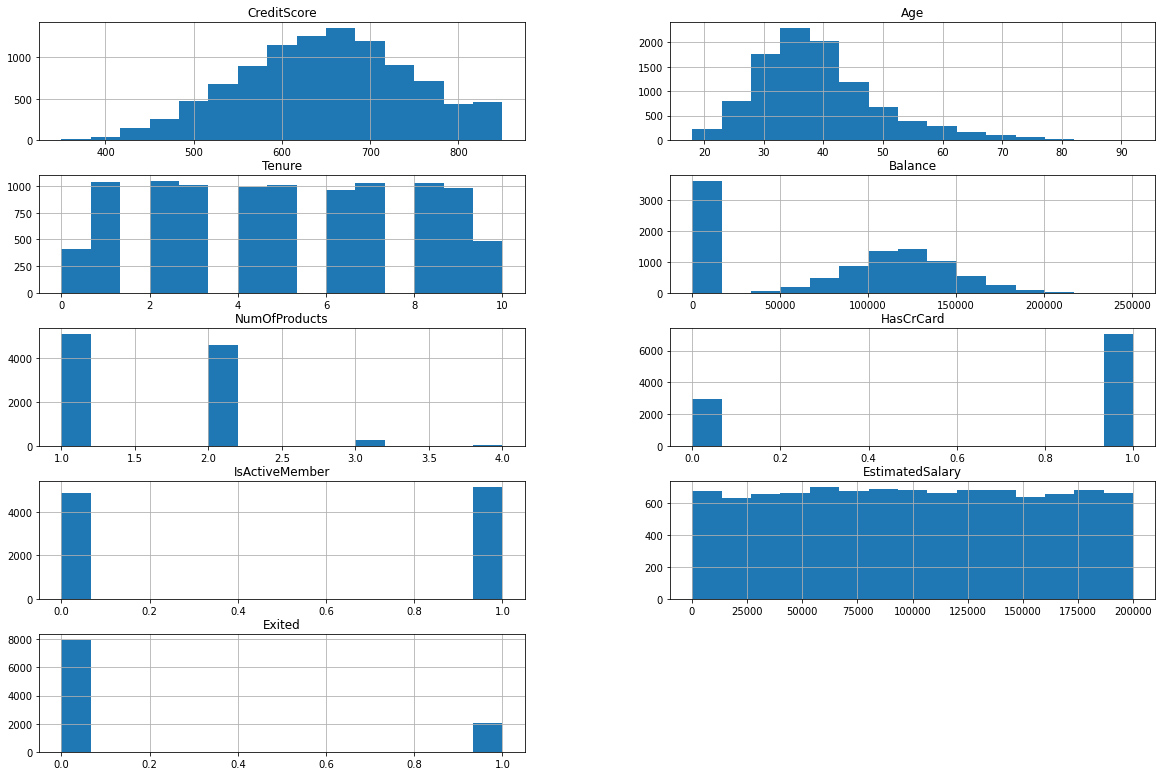

In [29]:
columns = list(df)
df[columns].hist(stacked=True, bins=15, figsize=(20,50), layout=(18,2)); 

In [30]:
df.corr()

CreditScore       Age  ...  EstimatedSalary    Exited
CreditScore         1.000000 -0.004000  ...        -0.001279 -0.027219
Age                -0.004000  1.000000  ...        -0.007101  0.285269
Tenure              0.000863 -0.009977  ...         0.007724 -0.013934
Balance             0.006224  0.028266  ...         0.012929  0.118412
NumOfProducts       0.012294 -0.030629  ...         0.014048 -0.047651
HasCrCard          -0.005498 -0.011759  ...        -0.009823 -0.007267
IsActiveMember      0.025594  0.085421  ...        -0.011255 -0.156358
EstimatedSalary    -0.001279 -0.007101  ...         1.000000  0.012445
Exited             -0.027219  0.285269  ...         0.012445  1.000000

[9 rows x 9 columns]

In [31]:
#Converting Geography & Gender to One-Hot Encoding

In [32]:
df = pd.get_dummies(df, columns=['Geography'])

In [33]:
df = pd.get_dummies(df, columns=['Gender'])

In [34]:
df.head()

CreditScore  Age  Tenure  ...  Geography_Spain  Gender_Female  Gender_Male
0          619   42       2  ...                0              1            0
1          608   41       1  ...                1              1            0
2          502   42       8  ...                0              1            0
3          699   39       1  ...                0              1            0
4          850   43       2  ...                1              1            0

[5 rows x 14 columns]

In [35]:
df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

**Based on analysis above, we see that people who majorly exited are based in Germany & France, mostly females & have an average age of 44-45 years. There is no correlation between independent variables**

Distinguish the features and target variable(5points)

In [36]:
x = df.drop('Exited',axis=1)     
y = df['Exited'] 

In [37]:
x.head()

CreditScore  Age  Tenure  ...  Geography_Spain  Gender_Female  Gender_Male
0          619   42       2  ...                0              1            0
1          608   41       1  ...                1              1            0
2          502   42       8  ...                0              1            0
3          699   39       1  ...                0              1            0
4          850   43       2  ...                1              1            0

[5 rows x 13 columns]

In [38]:
x.shape

(9999, 13)

In [39]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [40]:
y.shape

(9999,)


Divide the data set into training and test sets (5points)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

Normalize the train and test data (10points)

In [42]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(x_train)

# Scale the train set
x_train = scaler.transform(x_train)

# Scale the test set
x_test = scaler.transform(x_test)


Initialize & build the model. Identify the points of improvement and implement the same. Note that you need to demonstrate at least two models(the original and the improved one) and highlight the differences to complete this point. You can also demonstrate more models. (20points)


In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6999, 13)
(3000, 13)
(6999,)
(3000,)


Neural Network - Original model 

Parameters: 
1st layer activation - relu, 
2nd layer activation - tanh, 
optimizer = Adam, 
learning rate = 0.1

In [45]:
model = Sequential()

In [46]:
model.add(Dense(2000, input_shape = (13,), activation = 'relu'))
model.add(Dense(500, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

In [47]:
opt = optimizers.Adam(lr = 0.1)

In [48]:
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])


In [49]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2000)              28000     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 501       
Total params: 1,029,001
Trainable params: 1,029,001
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(x_train, y_train.values, batch_size = 50, epochs = 8, verbose = 1)

Epoch 1/8
140/140 [==============================] - 0s 3ms/step - loss: 1.6126 - accuracy: 0.6827
Epoch 2/8
140/140 [==============================] - 0s 2ms/step - loss: 1.3512 - accuracy: 0.6674
Epoch 3/8
140/140 [==============================] - 0s 2ms/step - loss: 1.4859 - accuracy: 0.6780
Epoch 4/8
140/140 [==============================] - 0s 2ms/step - loss: 2.4488 - accuracy: 0.6762
Epoch 5/8
140/140 [==============================] - 0s 2ms/step - loss: 1.9197 - accuracy: 0.6891
Epoch 6/8
140/140 [==============================] - 0s 2ms/step - loss: 1.1865 - accuracy: 0.6865
Epoch 7/8
140/140 [==============================] - 0s 2ms/step - loss: 1.2592 - accuracy: 0.6737
Epoch 8/8
140/140 [==============================] - 0s 2ms/step - loss: 0.9279 - accuracy: 0.7022


In [51]:
results = model.evaluate(x_test, y_test.values)

94/94 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.8093


In [52]:
loss, acc = model.evaluate(x_test, y_test.values, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.809
Loss: 0.576


In [53]:
result = pd.DataFrame({'Model' : ['Original Model'], 'Loss' : [loss],'Accuracy' : [acc]})
result

Model      Loss  Accuracy
0  Original Model  0.576474  0.809333

Neural Network - Improved model 1

Parameters: 
1st layer activation - relu, 
2nd layer activation - relu, 
optimizer = SGD, 
learning rate = 0.001

In [54]:
model = Sequential()

In [55]:
model.add(Dense(2000, input_shape = (13,), activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [56]:
opt = optimizers.SGD(lr = 0.001)

In [57]:
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2000)              28000     
_________________________________________________________________
dense_4 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 501       
Total params: 1,029,001
Trainable params: 1,029,001
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(x_train, y_train.values, batch_size = 50, epochs = 10, verbose = 1)

Epoch 1/10
140/140 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.6930
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.7908
Epoch 3/10
140/140 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7908
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.7908
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 0.5392 - accuracy: 0.7908
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7908
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.7908
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7908
Epoch 9/10
140/140 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7908
Epoch 10/10
140/140 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7908

In [60]:
results = model.evaluate(x_test, y_test.values)

94/94 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.8093


In [61]:
loss, acc = model.evaluate(x_test, y_test.values, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss) 

Accuracy: 0.809
Loss: 0.476


In [62]:
result.loc[1] = ['Improved Model 1', loss, acc]
result

Model      Loss  Accuracy
0    Original Model  0.576474  0.809333
1  Improved Model 1  0.475991  0.809333

Neural Network - Improved model 2

Parameters: 
1st layer activation - relu, 
2nd layer activation - tanh, 
optimizer = Adam, 
learning rate = 0.01

In [63]:
model = Sequential()

In [64]:
model.add(Dense(2000, input_shape = (13,), activation = 'relu'))
model.add(Dense(500, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

In [65]:
opt = optimizers.Adam(lr = 0.01)

In [66]:
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2000)              28000     
_________________________________________________________________
dense_7 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 501       
Total params: 1,029,001
Trainable params: 1,029,001
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.fit(x_train, y_train.values, batch_size = 50, epochs = 10, verbose = 1)

Epoch 1/10
140/140 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.8083
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8358
Epoch 3/10
140/140 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8374
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8408
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8441
Epoch 6/10
140/140 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8475
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8435
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8431
Epoch 9/10
140/140 [==============================] - 0s 3ms/step - loss: 0.3755 - accuracy: 0.8455
Epoch 10/10
140/140 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8444

In [69]:
results = model.evaluate(x_test, y_test.values)

94/94 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8590


In [70]:
loss, acc = model.evaluate(x_test, y_test.values, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss) 

Accuracy: 0.859
Loss: 0.376


In [71]:
result.loc[2] = ['Improved Model 2', loss, acc]
result

Model      Loss  Accuracy
0    Original Model  0.576474  0.809333
1  Improved Model 1  0.475991  0.809333
2  Improved Model 2  0.375723  0.859000

**By using different hyper-parameters we have increased the accuracy as well as reduced the loss function. Accuracy = 85.9% & Loss Function = 0.375-->**

**We achieve highest accuracy & lowest loss function for following parameters:**
**1st layer activation - relu,**
**2nd layer activation - tanh,**
**optimizer = Adam,** 
**learning rate = 0.01**


Predict the results using 0.5 as a threshold. Note that you need to first predict the probability and then predict classes using the given threshold (10points)


In [72]:
#By default the threshold for predict function is 0.5.

In [73]:
y_predict = model.predict(x_test)

In [75]:
y_pred_class = (model.predict(x_test) > 0.5).astype("int32")

In [77]:
# Showing the inputs and predicted outputs
for i in range(len(x_test)):
	print("X=%s, Predicted=%s" % (x_test[i], y_pred_class[i]))

Streaming output truncated to the last 5000 lines.
  0.91382782], Predicted=[0]
X=[ 0.47975012 -0.18971943  0.68757738  1.4701306  -0.89913409  0.64960213
 -1.02268911 -1.13449894 -1.01308749 -0.57058582  1.74183976  1.09429805
 -1.09429805], Predicted=[0]
X=[ 0.09659896 -1.81020666  0.341564    1.46402872 -0.89913409  0.64960213
 -1.02268911 -0.74450877  0.98708158 -0.57058582 -0.57410562  1.09429805
 -1.09429805], Predicted=[0]
X=[-0.74219141 -0.7616561   0.341564   -1.21934113  0.8235704   0.64960213
 -1.02268911 -1.29586502  0.98708158 -0.57058582 -0.57410562 -0.91382782
  0.91382782], Predicted=[0]
X=[ 0.7282806   0.19157168  0.341564    0.94211971 -0.89913409  0.64960213
  0.97781427 -0.63092008  0.98708158 -0.57058582 -0.57410562 -0.91382782
  0.91382782], Predicted=[0]
X=[ 0.0241109  -0.7616561  -1.04248951  1.25689202  0.8235704  -1.53940381
 -1.02268911 -1.31262813 -1.01308749  1.75258473 -0.57410562 -0.91382782
  0.91382782], Predicted=[0]
X=[ 0.27264138 -0.95230166 -0.69647


Print the Accuracy score and confusion matrix (5points)

In [78]:
from sklearn import metrics

In [79]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

In [80]:
cm = metrics.confusion_matrix(y_test,y_pred_class)
print(cm)

[[2378   50]
 [ 373  199]]


In [81]:
cr=metrics.classification_report(y_test,y_pred_class)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2428
           1       0.80      0.35      0.48       572

    accuracy                           0.86      3000
   macro avg       0.83      0.66      0.70      3000
weighted avg       0.85      0.86      0.84      3000



In [86]:
y_pred_class = (model.predict(x_test) > 0.5).astype("int32")
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(x_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,y_pred_class)))
print('Precision_score: ' + str(precision_score(y_test.values, y_pred_class)))
print('F-score: ' + str(f1_score(y_test.values,y_pred_class)))
confusion_matrix(y_test.values, y_pred_class)

94/94 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8590
Accuracy Model1 (Dropout): 0.859000027179718
Recall_score: 0.3479020979020979
Precision_score: 0.7991967871485943
F-score: 0.4847746650426309


array([[2378,   50],
       [ 373,  199]])

**We have thus created an Artificial Neural Network model with an accuracy score of 85.4%. It can be used in business to predict churn for any new customers based on their profile.**

GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-astha1992
